['MiniGrid-BlockedUnlockPickup-v0', 'MiniGrid-LavaCrossingS9N1-v0', 'MiniGrid-LavaCrossingS9N2-v0', 'MiniGrid-LavaCrossingS9N3-v0', 'MiniGrid-LavaCrossingS11N5-v0', 'MiniGrid-SimpleCrossingS9N1-v0', 'MiniGrid-SimpleCrossingS9N2-v0', 'MiniGrid-SimpleCrossingS9N3-v0', 'MiniGrid-SimpleCrossingS11N5-v0', 'MiniGrid-DistShift1-v0', 'MiniGrid-DistShift2-v0', 'MiniGrid-DoorKey-5x5-v0', 'MiniGrid-DoorKey-6x6-v0', 'MiniGrid-DoorKey-8x8-v0', 'MiniGrid-DoorKey-16x16-v0', 'MiniGrid-Dynamic-Obstacles-5x5-v0', 'MiniGrid-Dynamic-Obstacles-Random-5x5-v0', 'MiniGrid-Dynamic-Obstacles-6x6-v0', 'MiniGrid-Dynamic-Obstacles-Random-6x6-v0', 'MiniGrid-Dynamic-Obstacles-8x8-v0', 'MiniGrid-Dynamic-Obstacles-16x16-v0', 'MiniGrid-Empty-5x5-v0', 'MiniGrid-Empty-Random-5x5-v0', 'MiniGrid-Empty-6x6-v0', 'MiniGrid-Empty-Random-6x6-v0', 'MiniGrid-Empty-8x8-v0', 'MiniGrid-Empty-16x16-v0', 'MiniGrid-Fetch-5x5-N2-v0', 'MiniGrid-Fetch-6x6-N2-v0', 'MiniGrid-Fetch-8x8-N3-v0', 'MiniGrid-FourRooms-v0', 'MiniGrid-GoToDoor-5x5-

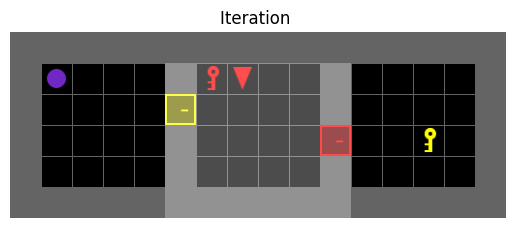


Knowledge Base: 
Room 0:
  purple ball is at (1, 1)
  yellow door is at (5, 2) and is currently locked
Room 1:
  red key is at (6, 1)
  yellow door is at (5, 2) and is currently locked
  red door is at (10, 3) and is currently locked
Room 2:
  yellow key is at (13, 3)
  red door is at (10, 3) and is currently locked

Connections:
Room 0 connect to Room 1 by yellow door at (5, 2) which is currently locked
Room 1 connect to Room 2 by red door at (10, 3) which is currently locked



In [1]:
%reload_ext autoreload
%autoreload 2
import random
import gymnasium as gym
import minigrid
import matplotlib.pyplot as plt
from VLA2Systems.utils import (
    print_grid,
    render_env
)
from VLA2Systems.knowledge_base import KnowledgeBase
import imageio

def save_env_image(env, filename="env_image.png"):
    """Save the environment image to a file."""
    frame = env.render()
    imageio.imwrite(filename, frame)

# # List all available MiniGrid environments
env_list = [env_id for env_id in gym.envs.registry if "MiniGrid" in env_id]
print(env_list)
# Randomly select an environment
env_name = random.choice(env_list)
# print(f"Selected Environment: {env_name}")
# env_name = "BabyAI-ActionObjDoor-v0"
# env_name = "MiniGrid-DoorKey-16x16-v0"
# env_name = "BabyAI-BlockedUnlockPickup-v0"
# env_name = "BabyAI-FindObjS5-v0"
# env_name = "BabyAI-BossLevel-v0"
# env_name = "MiniGrid-MultiRoom-N6-v0"
# env_name = "MiniGrid-MultiRoom-N4-S5-v0"
env_name = "BabyAI-UnlockToUnlock-v0"
# env_name = "BabyAI-BlockedUnlockPickup-v0"

# seed = 69
seed = random.randint(1, 1000)
# seed = 494 # 152, 232
# seed = 39
print(f"seed is {seed}")
# Create the environment
env = gym.make(env_name, render_mode="rgb_array")

# Reset the environment to initialize it
env.reset(seed=seed)
# env.reset()
knowledge_base = KnowledgeBase(env)
# Print the grid
# print("\nGrid Map:")
# print_grid(knowledge_base.grid_data)
# Render the environment dynamically
fig, ax = plt.subplots()
render_env(env, ax, 2)
# Save the environment image
save_env_image(env, filename="env_image.png")

print(f"\nKnowledge Base: \n{knowledge_base}\n")
with open("./file.txt",'w') as file:
    file.write(str(knowledge_base))


In [ ]:
%reload_ext autoreload
%autoreload 2
from VLA2Systems.task_planning import RobotPlanner
print("Planner")
robot_position = env.unwrapped.agent_pos
robot_direction = env.unwrapped.agent_dir
start_location = int(robot_direction), tuple((int(robot_position[0]), int(robot_position[1])))
holding = None
# start_location = 0, (1, 11)
# holding=('key', 'yellow')
print(f"start location is: {start_location}")

planner = RobotPlanner(knowledge_base, start_location=start_location, holding=holding, verbose=3)


Planner
start location is: (1, (7, 1))


FAILED DIRECTLY GOTO, gonna try with searching for the object
object_is_not_in_the_room  True
GOING IN search_rooms
[('pick_up_object', 'key', 'yellow', None), ('open_door', 'door', 'yellow', (5, 2)), ('go_to_object', 'ball', 'purple', None, 0)]
going to return plan [('pick_up_object', 'key', 'yellow', None), ('open_door', 'door', 'yellow', (5, 2)), ('go_to_object', 'ball', 'purple', None, 0)]
FAILED DIRECTLY GOTO, gonna try with searching for the object
object_is_not_in_the_room  True
GOING IN search_rooms
[('pick_up_object', 'key', 'red', None), ('open_door', 'door', 'red', (10, 3)), ('pick_up_object', 'key', 'yellow', None, 2)]
going to return plan [('pick_up_object', 'key', 'red', None), ('open_door', 'door', 'red', (10, 3)), ('pick_up_object', 'key', 'yellow', None, 2)]
FAILED DIRECTLY GOTO, gonna try with searching for the object
object_is_not_in_the_room  False


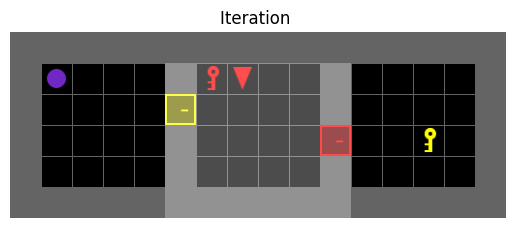

Step 1: Pick up red key
Step 2: Open red door
Step 3: Pick up yellow key
Step 4: Open yellow door
Step 5: Go to purple ball


In [7]:
# plan = planner.plan_go_to('red', 'door')
# plan = planner.plan_go_to('green', 'key')
# plan = planner.plan_go_to('yellow', 'key')
plan = planner.plan_go_to('purple', 'ball')
# plan = planner.plan_go_to('green', 'goal')
# plan = planner.plan_go_to('purple', 'box', (10, 19))
# print(plan)
if plan:
    fig, ax = plt.subplots()
    render_env(env, ax, 2)
    print(planner)
else:
    print("No valid plan found.")

FAILED DIRECTLY GOTO, gonna try with searching for the object
object_is_not_in_the_room  True
GOING IN search_rooms
[('pick_up_object', 'key', 'yellow', None), ('open_door', 'door', 'yellow', (5, 2)), ('pick_up_object', 'ball', 'purple', None, 0)]
going to return plan [('pick_up_object', 'key', 'yellow', None), ('open_door', 'door', 'yellow', (5, 2)), ('pick_up_object', 'ball', 'purple', None, 0)]
FAILED DIRECTLY GOTO, gonna try with searching for the object
object_is_not_in_the_room  True
GOING IN search_rooms
[('pick_up_object', 'key', 'red', None), ('open_door', 'door', 'red', (10, 3)), ('pick_up_object', 'key', 'yellow', None, 2)]
going to return plan [('pick_up_object', 'key', 'red', None), ('open_door', 'door', 'red', (10, 3)), ('pick_up_object', 'key', 'yellow', None, 2)]
FAILED DIRECTLY GOTO, gonna try with searching for the object
object_is_not_in_the_room  False
FAILED DIRECTLY GOTO, gonna try with searching for the object
object_is_not_in_the_room  False


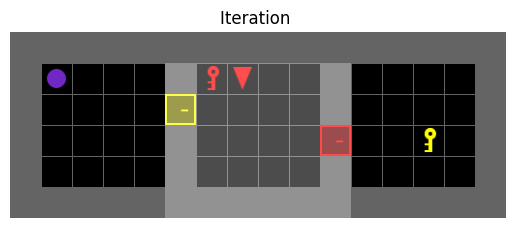

Step 1: Pick up red key
Step 2: Open red door
Step 3: Pick up yellow key
Step 4: Open yellow door
Step 5: Pick up purple ball


In [8]:
plan = planner.plan_pick_up('purple', 'ball')
# plan = planner.plan_pick_up('green', 'goal')
if plan:
    fig, ax = plt.subplots()
    render_env(env, ax, 2)
    print(planner)
else:
    print("No valid plan found.")

tasks [('pick_up_object', 'ball', 'purple')]
state.holding is None
JUST WENT IN drop_next_to
FAILED DIRECTLY GOTO, gonna try with searching for the object
object_is_not_in_the_room  False
FAILED searching for the object
FAILED DIRECTLY GOTO, gonna try with searching for the object
object_is_not_in_the_room  True
GOING IN search_rooms
[('pick_up_object', 'key', 'yellow', None), ('open_door', 'door', 'yellow', (5, 2)), ('pick_up_object', 'ball', 'purple', None, 0)]
going to return plan [('pick_up_object', 'key', 'yellow', None), ('open_door', 'door', 'yellow', (5, 2)), ('pick_up_object', 'ball', 'purple', None, 0)]
FAILED DIRECTLY GOTO, gonna try with searching for the object
object_is_not_in_the_room  True
GOING IN search_rooms
[('pick_up_object', 'key', 'red', None), ('open_door', 'door', 'red', (10, 3)), ('pick_up_object', 'key', 'yellow', None, 2)]
going to return plan [('pick_up_object', 'key', 'red', None), ('open_door', 'door', 'red', (10, 3)), ('pick_up_object', 'key', 'yellow', 

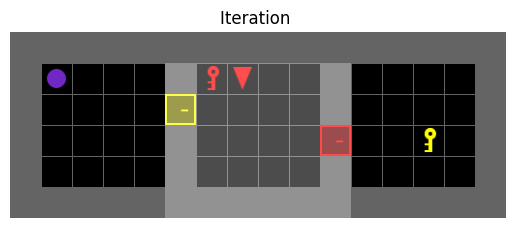

Step 1: Pick up red key
Step 2: Open red door
Step 3: Pick up yellow key
Step 4: Open yellow door
Step 5: Pick up purple ball
Step 6: Drop purple ball next to red key


In [9]:
plan = planner.plan_drop_next_to('purple', 'ball', 'red','key')
if plan:
    fig, ax = plt.subplots()
    render_env(env, ax, 2)
    print(planner)
else:
    print("No valid plan found.")

In [6]:
# ! Key error
# ** hop, verbose=3: **
#    state = robot_state
#    tasks = [('drop_next_to_object', 'box', 'green', 'door', 'green', None)]
# depth 0 tasks [('drop_next_to_object', 'box', 'green', 'door', 'green', None)]
# depth 0 method instance ('drop_next_to_object', 'box', 'green', 'door', 'green', None)
# depth 0 new tasks: False
# ** result = None 

# No valid plan found.